Contains 25.75% of the information.


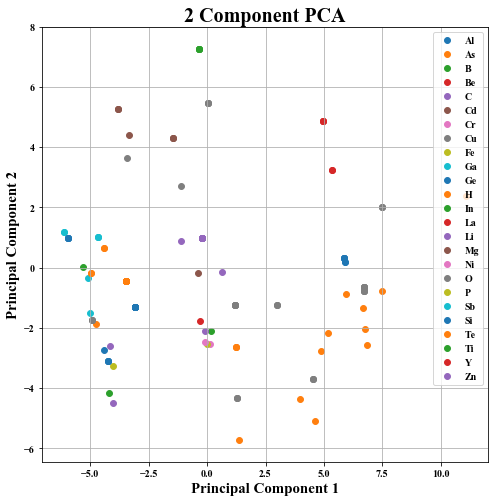

In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('Combined_Descriptors.csv',header=None)
df.drop([0,2],axis=1,inplace=True)
#df.head()

cols = [i for i in range(3,54)]
x = df.loc[:, cols].values
y = df.loc[:,[1]].values

x = StandardScaler().fit_transform(x)
pd.DataFrame(data = x, columns = cols)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

#print(principalDf.to_string())
finalDf = pd.concat([principalDf, df[[1]]], axis = 1)
#print(finalDf.to_string())

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = ['Al','As','B','Be','C','Cd','Cr','Cu','Fe','Ga','Ge','H','In','La','Li','Mg','Ni','O','P','Sb','Si','Te','Ti','Y','Zn']
#targets = ['H','O'] #do Hydrogen and Oxygen
#colors = ['red','blue']

plt.rc('font', **{'family':'sans-serif','sans-serif':['Times New Roman']})

#for subsets of all targets
'''
for i in range(0,len(targets)):
    indicesToKeep = finalDf[1] == targets[i]
    #print(finalDf.loc[indicesToKeep])
    plt.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = colors[i]
               , s = 35)
'''

for i in range(0,len(targets)):
    indicesToKeep = finalDf[1] == targets[i]
    #print(finalDf.loc[indicesToKeep])
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               #, c = colors[i]
               , s = 35)


#lots of overlap of dots since the values are so similar
#all ~150 entries are represented

print('Contains ' + str(round(sum(pca.explained_variance_),2)) + '% of the information.')

ax.legend(targets)
ax.grid()